# Crime in Baltimore

## Preparation

### Loading Libraries & Data

Installation of Folium in the environment.

In [1]:
!pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('./data2.csv')

### Overview

In [4]:
df.head()

CrimeDate CrimeTime CrimeCode            Location     Description  \
0  08/29/2020  09:10:00        4E  100 S PRESIDENT ST  COMMON ASSAULT   
1  08/29/2020  12:00:00        5A  1500 N CAROLINE ST        BURGLARY   
2  08/29/2020  04:52:00        5A       2600 HAFER ST        BURGLARY   
3  08/29/2020  18:30:00        5A      4100 HAGUE AVE        BURGLARY   
4  08/29/2020  11:03:00        6J   2800 HILLDALE AVE         LARCENY   

  Inside/Outside Weapon   Post   District  Neighborhood  Longitude   Latitude  \
0              I    NaN  211.0  SOUTHEAST     JONESTOWN -76.604646  39.288254   
1              I    NaN  314.0    EASTERN        OLIVER -76.598250  39.307393   
2              I    NaN  835.0  SOUTHWEST  SHIPLEY HILL -76.658563  39.282913   
3              I    NaN  913.0   SOUTHERN      BROOKLYN -76.602047  39.228210   
4              O    NaN  612.0  NORTHWEST   PARK CIRCLE -76.659885  39.327344   

   Location 1            Premise  vri_name1  Total Incidents  
0         NaN  OTHER/RESIDENTIAL        NaN                1  
1         NaN  ROW/TOWNHOUSE-VAC  Eastern 1                1  
2         NaN  ROW/TOWNHOUSE-OCC        NaN                1  
3         NaN  ROW/TOWNHOUSE-OCC        NaN                1  
4         NaN         PORCH/DECK        NaN                1

In [5]:
df.shape

(312914, 16)

In [6]:
df.describe()

Post      Longitude       Latitude  Location 1  \
count  310826.000000  311281.000000  311281.000000         0.0   
mean      505.047650     -76.582132      39.288556         NaN   
std       261.191401       1.648111       0.845743         NaN   
min       111.000000     -81.529189       0.000000         NaN   
25%       234.000000     -76.649315      39.288157         NaN   
50%       511.000000     -76.614083      39.302763         NaN   
75%       724.000000     -76.586995      39.326861         NaN   
max       943.000000       0.000000      39.661332         NaN   

       Total Incidents  
count         312914.0  
mean               1.0  
std                0.0  
min                1.0  
25%                1.0  
50%                1.0  
75%                1.0  
max                1.0

In [7]:
df.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post               float64
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Location 1         float64
Premise             object
vri_name1           object
Total Incidents      int64
dtype: object

In [8]:
def columns_overview(clmns):
    
    for name in clmns:
        print("{}:\nsize= {}, list= {}\n\n".format(name, np.size(df[name].unique()), df[name].unique()))

In [9]:
clmns = df.columns
columns_overview(clmns)

CrimeDate:
size= 2507, list= ['08/29/2020' '08/28/2020' '08/27/2020' ... '07/01/1973' '07/20/1969'
 '10/30/1963']


CrimeTime:
size= 1477, list= ['09:10:00' '12:00:00' '04:52:00' ... '22:26:39' '13:38:52' '01:52:27']


CrimeCode:
size= 81, list= ['4E' '5A' '6J' '6F' '6D' '6E' '4C' '4A' '3AF' '3AK' '5D' '4B' '5B' '9S'
 '4D' '7A' '3K' '3B' '6G' '3AJF' '3CF' '3BJ' '6C' '5E' '5C' '3P' '3D'
 '3GK' '3AO' '1A' '3AJK' '7C' '3NO' '3JK' '3JF' '2A' '5F' '3AJO' '3F' '6B'
 '6A' '8AO' '8H' '3JO' '5G' '8BO' '3GF' '1K' '6L' '3CK' '3H' '3EF' '3CO'
 '3GO' '7B' '1O' '2B' '6H' '3NF' '8J' '8CV' '3LO' '8EO' '8FO' '3M' '3LF'
 '8FV' '3NK' '3EK' '8BV' '3EO' '8EV' '8AV' '8GV' '8GO' '6K' '8I' '3LK'
 '8CO' '8DO' '3N']


Location:
size= 20105, list= ['100 S PRESIDENT ST' '1500 N CAROLINE ST' '2600 HAFER ST' ...
 '5300 WYNDHOLME CR     #UNIT 10' '5900 EDNA AV' '900 DENISON']


Description:
size= 14, list= ['COMMON ASSAULT' 'BURGLARY' 'LARCENY' 'LARCENY FROM AUTO' 'AGG. ASSAULT'
 'ROBBERY - STREET' 'SHOOTING' 'AUTO 

In [10]:
def columns_value_counts(clmns):
    
    for name in clmns:
        print("{}:\n{}\n\n".format(name, df[name].value_counts(dropna=False)))

In [11]:
columns_value_counts(clmns)

CrimeDate:
04/27/2015    421
06/05/2016    255
12/20/2018    212
01/20/2017    205
10/25/2017    202
             ... 
07/20/1969      1
09/26/2008      1
05/01/1988      1
08/01/2013      1
10/01/2001      1
Name: CrimeDate, Length: 2507, dtype: int64


CrimeTime:
18:00:00    7095
17:00:00    6893
12:00:00    6389
16:00:00    6286
20:00:00    6255
            ... 
16:37:17       1
17:29:31       1
23:04:29       1
04:09:18       1
19:29:37       1
Name: CrimeTime, Length: 1477, dtype: int64


CrimeCode:
4E     52356
6D     40899
5A     26488
7A     25889
6J     17502
       ...  
8I         4
8CV        4
3LK        4
8DO        2
3N         1
Name: CrimeCode, Length: 81, dtype: int64


Location:
NaN                             1610
1500 RUSSELL ST                  884
3500 BOSTON ST                   732
2400 FREDERICK AVE               702
2400 LIBERTY HEIGHTS AVE         645
                                ... 
AVE & BONAPARTE AVE                1
ST & S WOLFE ST                   

# Questions
### 1. Can we delete some columns?
### 2. Can we simplify some columns?
### 3. Is there a link between Crimecode and Description?
### 4. ~~Is it possible to infer the Weapon from Description?~~
### 5. What day of the week is there the most crime?
### 6. What time is the most dangerous?
### 7. What's the most common crime?
### 8. ~~What weapons are most often used?~~
### 9. What are the most dangerous districts?
### 10. how many posts are there in the most dangerous district?
### 11. If I am a tourist, where should I not go for a walk?
### 12. If I am a woman, where should I not go for a walk?

## 1.
There is a unique value, 1, in Total Incidents. Moreover, there is no values in Location 1. There is 275937 with a NaN value in the column vri_name1 and 246196 in Weapon. So we can drop these columns.

In [12]:
df.drop(["Total Incidents", "Location 1", "Weapon", "vri_name1"], axis=1, inplace=True)

In [13]:
df.head(1)

CrimeDate CrimeTime CrimeCode            Location     Description  \
0  08/29/2020  09:10:00        4E  100 S PRESIDENT ST  COMMON ASSAULT   

  Inside/Outside   Post   District Neighborhood  Longitude   Latitude  \
0              I  211.0  SOUTHEAST    JONESTOWN -76.604646  39.288254   

             Premise  
0  OTHER/RESIDENTIAL

## 2.

We rename some value in the Inside/Outside columns.

In [14]:
df["Inside/Outside"] = df["Inside/Outside"].replace({"Inside": "I", "Outside": "O"})

In [15]:
df["Inside/Outside"].value_counts(dropna=False)

O      142225
I      132562
NaN     38127
Name: Inside/Outside, dtype: int64

## 3.

In [16]:
sub = df[["CrimeCode", "Description"]]

In [17]:
sub.head()

CrimeCode     Description
0        4E  COMMON ASSAULT
1        5A        BURGLARY
2        5A        BURGLARY
3        5A        BURGLARY
4        6J         LARCENY

In [18]:
sub.groupby("Description")["CrimeCode"].unique()

Description
AGG. ASSAULT                                             [4C, 4A, 4B, 4D]
ARSON                   [8AO, 8H, 8BO, 8J, 8CV, 8EO, 8FO, 8FV, 8BV, 8E...
AUTO THEFT                                                   [7A, 7C, 7B]
BURGLARY                                     [5A, 5D, 5B, 5E, 5C, 5F, 5G]
COMMON ASSAULT                                                       [4E]
HOMICIDE                                                     [1A, 1K, 1O]
LARCENY                          [6J, 6F, 6E, 6G, 6C, 6B, 6A, 6L, 6H, 6K]
LARCENY FROM AUTO                                                    [6D]
RAPE                                                             [2A, 2B]
ROBBERY - CARJACKING                              [3AJF, 3BJ, 3AJK, 3AJO]
ROBBERY - COMMERCIAL    [3CF, 3D, 3GK, 3F, 3GF, 3CK, 3H, 3EF, 3CO, 3GO...
ROBBERY - RESIDENCE                                   [3K, 3JK, 3JF, 3JO]
ROBBERY - STREET               [3AF, 3AK, 3B, 3P, 3AO, 3NO, 3NF, 3NK, 3N]
SHOOTING                  

In [19]:
sub.groupby(["Description", "CrimeCode"]).first()

Empty DataFrame
Columns: []
Index: [(AGG. ASSAULT, 4A), (AGG. ASSAULT, 4B), (AGG. ASSAULT, 4C), (AGG. ASSAULT, 4D), (ARSON, 8AO), (ARSON, 8AV), (ARSON, 8BO), (ARSON, 8BV), (ARSON, 8CO), (ARSON, 8CV), (ARSON, 8DO), (ARSON, 8EO), (ARSON, 8EV), (ARSON, 8FO), (ARSON, 8FV), (ARSON, 8GO), (ARSON, 8GV), (ARSON, 8H), (ARSON, 8I), (ARSON, 8J), (AUTO THEFT, 7A), (AUTO THEFT, 7B), (AUTO THEFT, 7C), (BURGLARY, 5A), (BURGLARY, 5B), (BURGLARY, 5C), (BURGLARY, 5D), (BURGLARY, 5E), (BURGLARY, 5F), (BURGLARY, 5G), (COMMON ASSAULT, 4E), (HOMICIDE, 1A), (HOMICIDE, 1K), (HOMICIDE, 1O), (LARCENY, 6A), (LARCENY, 6B), (LARCENY, 6C), (LARCENY, 6E), (LARCENY, 6F), (LARCENY, 6G), (LARCENY, 6H), (LARCENY, 6J), (LARCENY, 6K), (LARCENY, 6L), (LARCENY FROM AUTO, 6D), (RAPE, 2A), (RAPE, 2B), (ROBBERY - CARJACKING, 3AJF), (ROBBERY - CARJACKING, 3AJK), (ROBBERY - CARJACKING, 3AJO), (ROBBERY - CARJACKING, 3BJ), (ROBBERY - COMMERCIAL, 3CF), (ROBBERY - COMMERCIAL, 3CK), (ROBBERY - COMMERCIAL, 3CO), (ROBBERY - COMMERCIAL, 3D), (ROBBERY - COMMERCIAL, 3EF), (ROBBERY - COMMERCIAL, 3EK), (ROBBERY - COMMERCIAL, 3EO), (ROBBERY - COMMERCIAL, 3F), (ROBBERY - COMMERCIAL, 3GF), (ROBBERY - COMMERCIAL, 3GK), (ROBBERY - COMMERCIAL, 3GO), (ROBBERY - COMMERCIAL, 3H), (ROBBERY - COMMERCIAL, 3LF), (ROBBERY - COMMERCIAL, 3LK), (ROBBERY - COMMERCIAL, 3LO), (ROBBERY - COMMERCIAL, 3M), (ROBBERY - RESIDENCE, 3JF), (ROBBERY - RESIDENCE, 3JK), (ROBBERY - RESIDENCE, 3JO), (ROBBERY - RESIDENCE, 3K), (ROBBERY - STREET, 3AF), (ROBBERY - STREET, 3AK), (ROBBERY - STREET, 3AO), (ROBBERY - STREET, 3B), (ROBBERY - STREET, 3N), (ROBBERY - STREET, 3NF), (ROBBERY - STREET, 3NK), (ROBBERY - STREET, 3NO), (ROBBERY - STREET, 3P), (SHOOTING, 9S)]

[81 rows x 0 columns]

So we can infer that we can't link a Crime Code to a Description. We drop the CrimeCode by lack of information.

In [20]:
df.drop("CrimeCode", axis=1, inplace=True)

## 5.

In [21]:
df["CrimeDate"] = pd.to_datetime(df["CrimeDate"], format="%m/%d/%Y")

In [22]:
df["Day"] = df["CrimeDate"].dt.day_name()

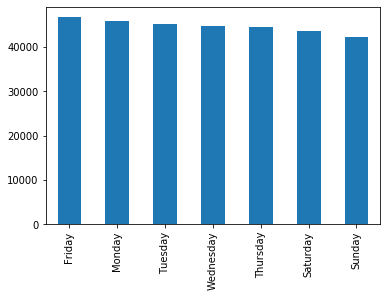

In [23]:
df["Day"].value_counts().plot.bar()
plt.show()

We can infer that Friday is the most dangerous day.

## 6.

In [24]:
df["CrimeTime"] = pd.to_datetime(df["CrimeTime"], format="%H:%M:%S")

In [25]:
df["hour"] = df["CrimeTime"].dt.hour

In [26]:
df["hour"].value_counts()

18.0    18556
17.0    18059
21.0    17561
20.0    17442
19.0    17231
16.0    16902
22.0    16841
15.0    16750
0.0     16441
12.0    15763
23.0    15327
14.0    14759
13.0    13747
11.0    12380
10.0    11977
1.0     11911
9.0     10986
8.0     10553
2.0      9346
7.0      8031
3.0      6754
6.0      5447
4.0      5351
5.0      4774
Name: hour, dtype: int64

We can infer that the most dangerous hour is between 18h-19h.

## 7.

In [27]:
df.head(1)

CrimeDate           CrimeTime            Location     Description  \
0 2020-08-29 1900-01-01 09:10:00  100 S PRESIDENT ST  COMMON ASSAULT   

  Inside/Outside   Post   District Neighborhood  Longitude   Latitude  \
0              I  211.0  SOUTHEAST    JONESTOWN -76.604646  39.288254   

             Premise       Day  hour  
0  OTHER/RESIDENTIAL  Saturday   9.0

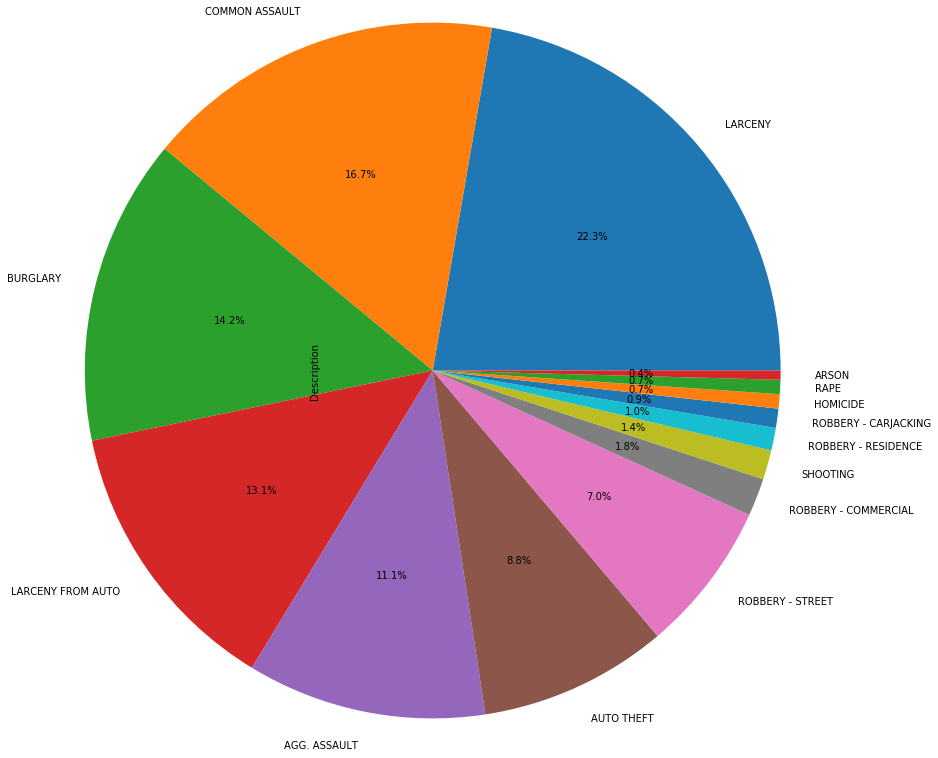

In [28]:
crimes = df["Description"].value_counts().plot.pie(radius=4, autopct='%1.1f%%')

The most common crime is larceny.

## 9.

In [29]:
df["District"].value_counts()

NORTHEAST    46474
SOUTHEAST    43679
CENTRAL      35939
SOUTHERN     34819
NORTHERN     34188
SOUTHWEST    32422
NORTHWEST    30855
EASTERN      27399
WESTERN      25051
Name: District, dtype: int64

The most dangerous districts are NORTHEAST and SOUTHEAST.

## 10.

In [30]:
df.head(1)

CrimeDate           CrimeTime            Location     Description  \
0 2020-08-29 1900-01-01 09:10:00  100 S PRESIDENT ST  COMMON ASSAULT   

  Inside/Outside   Post   District Neighborhood  Longitude   Latitude  \
0              I  211.0  SOUTHEAST    JONESTOWN -76.604646  39.288254   

             Premise       Day  hour  
0  OTHER/RESIDENTIAL  Saturday   9.0

In [31]:
df.groupby("District")["Post"].count()

District
CENTRAL      35939
EASTERN      27399
NORTHEAST    46474
NORTHERN     34188
NORTHWEST    30855
SOUTHEAST    43679
SOUTHERN     34819
SOUTHWEST    32422
WESTERN      25051
Name: Post, dtype: int64

We can infer that the district with the most posts are NORTHEAST and SOUTHEAST. It's logical with the previous question.

## 11.

Generally a tourist coulb be victim of robbery, larceny.

In [32]:
df["Description"].unique()

array(['COMMON ASSAULT', 'BURGLARY', 'LARCENY', 'LARCENY FROM AUTO',
       'AGG. ASSAULT', 'ROBBERY - STREET', 'SHOOTING', 'AUTO THEFT',
       'ROBBERY - RESIDENCE', 'ROBBERY - CARJACKING',
       'ROBBERY - COMMERCIAL', 'HOMICIDE', 'RAPE', 'ARSON'], dtype=object)

In [33]:
lst = ["LARCENY", "LARCENY FROM AUTO", "ROBBERY - STREET", "ROBBERY"]
sub = df[df["Description"].isin(lst)]

In [34]:
sub1 = sub[["Neighborhood", "Description"]]

In [35]:
sub1.groupby("Neighborhood").count().sort_values("Description", ascending=False)

Description
Neighborhood                        
DOWNTOWN                        5637
INNER HARBOR                    3243
CANTON                          2856
FRANKFORD                       2787
BELAIR-EDISON                   2609
...                              ...
TAYLOR HEIGHTS                    21
GREENMOUNT CEMETERY               15
MT PLEASANT PARK                  12
BLYTHEWOOD                         5
DUNDALK MARINE TERMINAL            3

[271 rows x 1 columns]

The center of Baltimore is the badest neighborhood for the tourist.

In [36]:
sub = sub[pd.notnull(sub['Latitude'])]
sub = sub[pd.notnull(sub['Longitude'])]
sub["Latitude"] = df["Latitude"].astype(float)
sub["Longitude"] = df["Longitude"].astype(float)

In [37]:
mp1 = folium.Map(location=[39.3121, -76.6198], zoom_start=12)

In [38]:
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in sub.iterrows()]

In [39]:
HeatMap(heat_data).add_to(mp1)

In [40]:
mp1

## 12.

In [41]:
sub = df[df["Description"] == "RAPE"]

In [42]:
sub1 = sub[["Neighborhood", "Description"]]
sub1.groupby("Neighborhood").count().sort_values("Description", ascending=False)

Description
Neighborhood                              
DOWNTOWN                                75
BROOKLYN                                56
SANDTOWN-WINCHESTER                     43
FRANKFORD                               42
BELAIR-EDISON                           41
...                                    ...
SPRING GARDEN INDUSTRIAL AREA            1
FOUR BY FOUR                             1
FAIRMONT                                 1
EVERGREEN LAWN                           1
ABELL                                    1

[238 rows x 1 columns]

Downtown is also the badest place for the women.

In [43]:
sub = sub[pd.notnull(sub['Latitude'])]
sub = sub[pd.notnull(sub['Longitude'])]
sub["Latitude"] = df["Latitude"].astype(float)
sub["Longitude"] = df["Longitude"].astype(float)

In [44]:
mp2 = folium.Map(location=[39.3121, -76.6198], zoom_start=12)

In [45]:
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in sub.iterrows()]

In [46]:
HeatMap(heat_data).add_to(mp2)

In [47]:
mp2